# Matplotlib - 2D and 3D plotting in Python

In [3]:
%matplotlib inline

In [4]:
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Matlab-like API

A simple figure with MATLAB-like plotting API:

In [5]:
x = np.linspace(0,5,10)
y = x**2

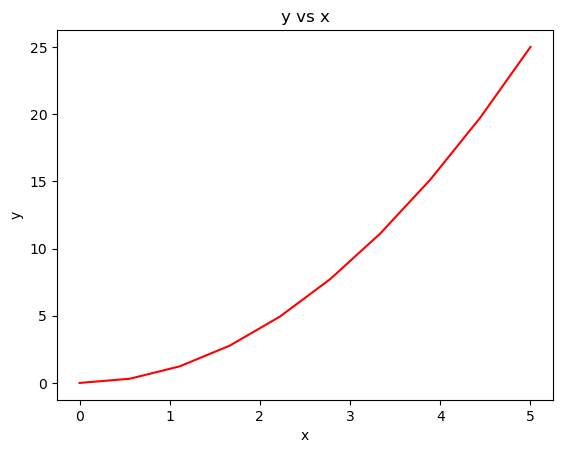

In [8]:
figure()
plt.plot(x,y,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')
plt.show()

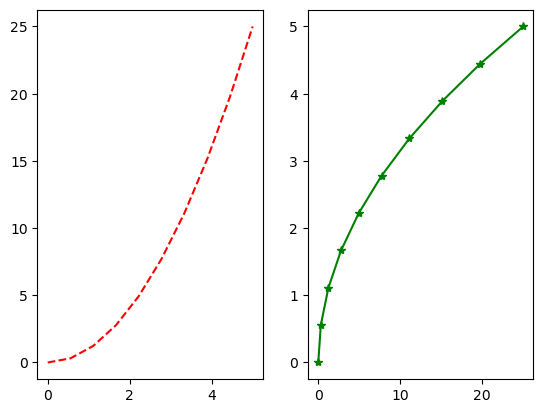

In [9]:
plt.subplot(1,2,1)
plt.plot(x,y,'r--')
plt.subplot(1,2,2)
plt.plot(y,x,'g*-')

### The matplotlib object-oriented API

Text(0.5, 1.0, 'y vs x')

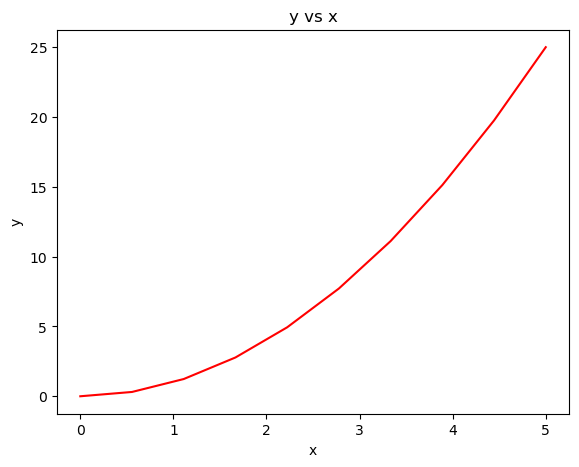

In [12]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('y vs x')

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

Text(0, 0.5, 'x')

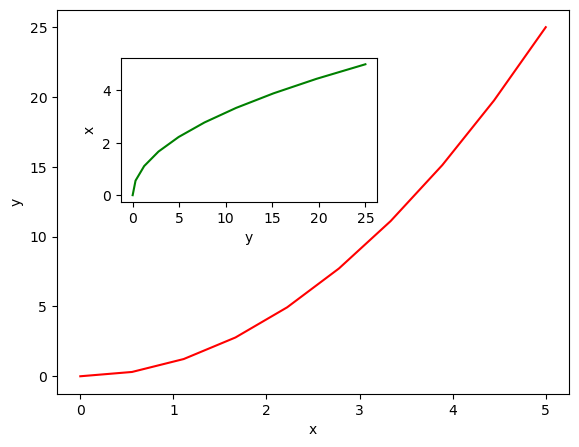

In [29]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

# main figure 
axes1.plot(x,y,'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')

# insert 
axes2.plot(y,x,'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')

If we don't care about being explicit about where out plot axes are placed in the figure canvas, then we could use one of the many axis layout managers in matplotlib

Text(0, 0.5, 'y')

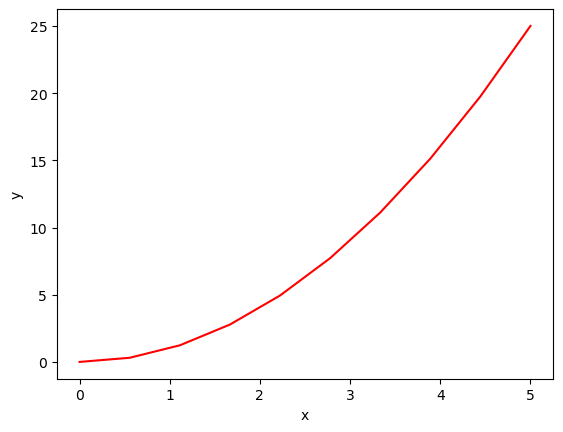

In [33]:
fig , axes = plt.subplots()

axes.plot(x,y,'r')
axes.set_xlabel('x')
axes.set_ylabel('y')

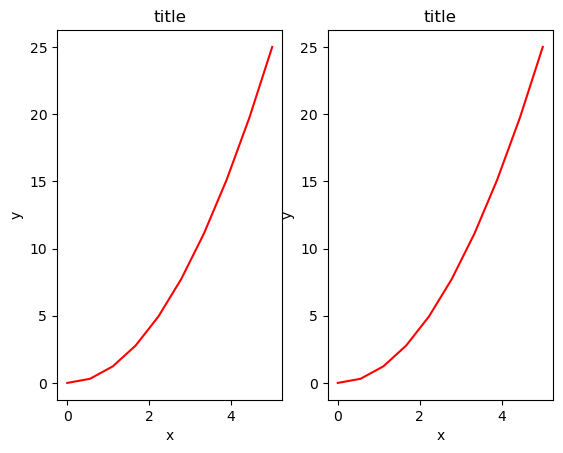

In [34]:
fig, axes = plt.subplots(1,2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

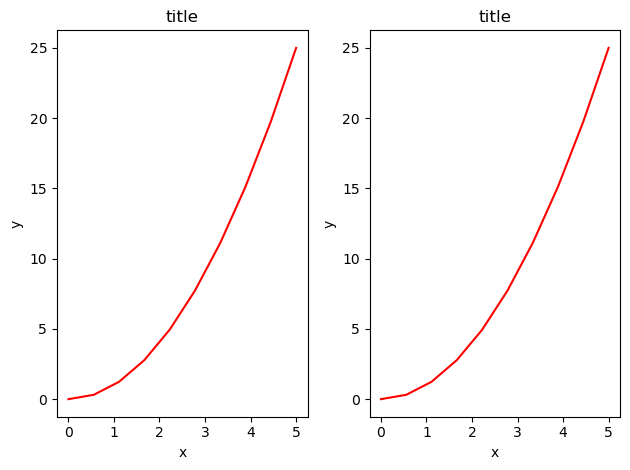

In [35]:
fig, axes = plt.subplots(1,2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the figure object is created using figsize and dpi keyword arguments

In [36]:
fig = plt.figure(figsize=(8,4),dpi = 100)

<Figure size 800x400 with 0 Axes>

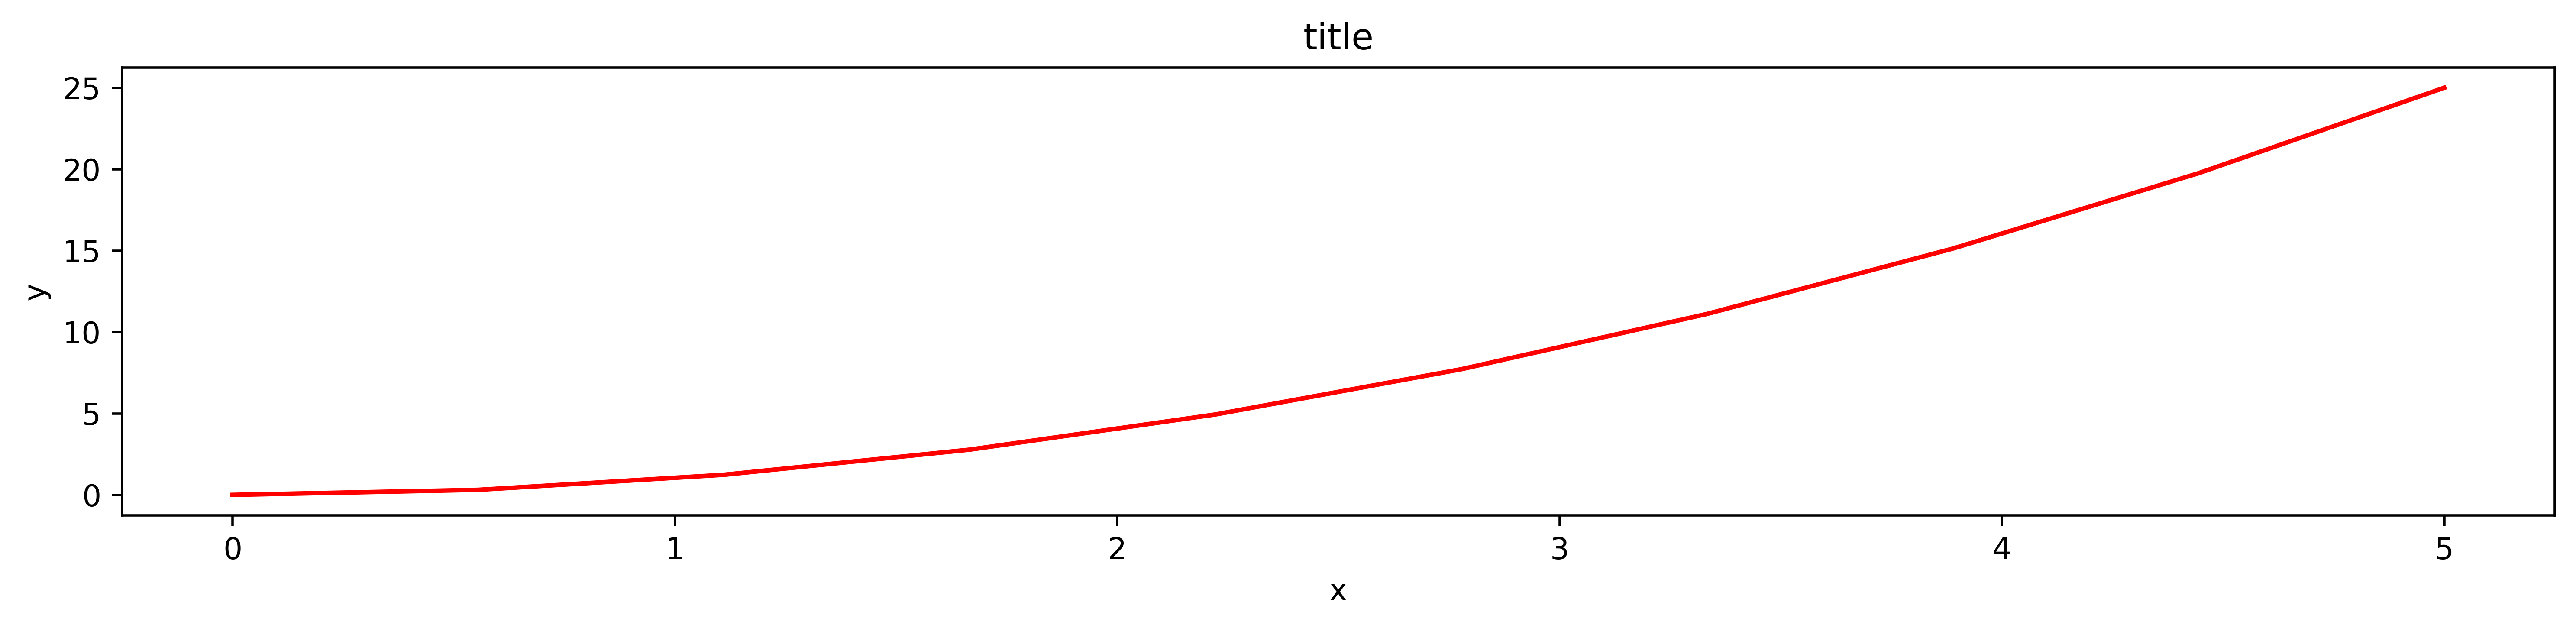

In [44]:
fig, axes = plt.subplots(figsize=(12,3),dpi =500)

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

fig.tight_layout()

#### Saving Figures

In [46]:
fig.savefig('graph.png')
fig.savefig('graph.pdf')

Text(0.5, 1.0, 'title')

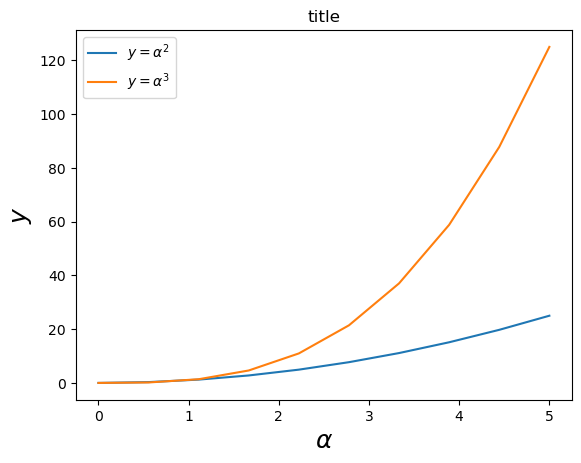

In [59]:
fig , ax = plt.subplots()

ax.plot(x,x**2,label= r"$y=\alpha^2$")
ax.plot(x,x**3,label= r"$y=\alpha^3$")
ax.legend(loc=2)
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r"$y$", fontsize =18)
ax.set_title('title')

### Control over axis appearence
#### Plot range

(0.0, 60.0)

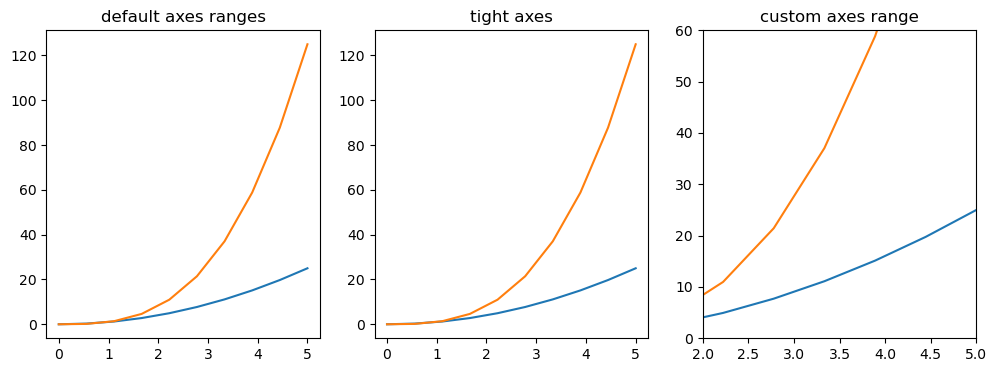

In [68]:
fig, axes = plt.subplots(1,3, figsize=(12,4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].set_title("tight axes")
axes[1].axis('tight')

axes[2].plot(x, x**2, x, x**3)
axes[2].set_title("custom axes range")
axes[2].set_xlim([2,5])
axes[2].set_ylim([0,60])

#### Logarithmic scale

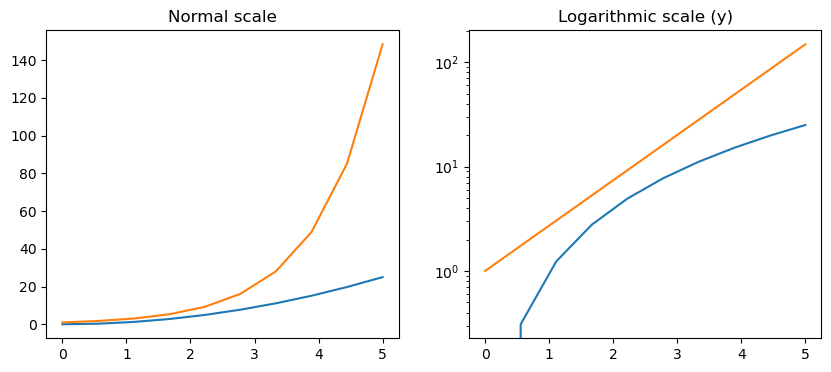

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

#### Placement of ticks and custom tick labels

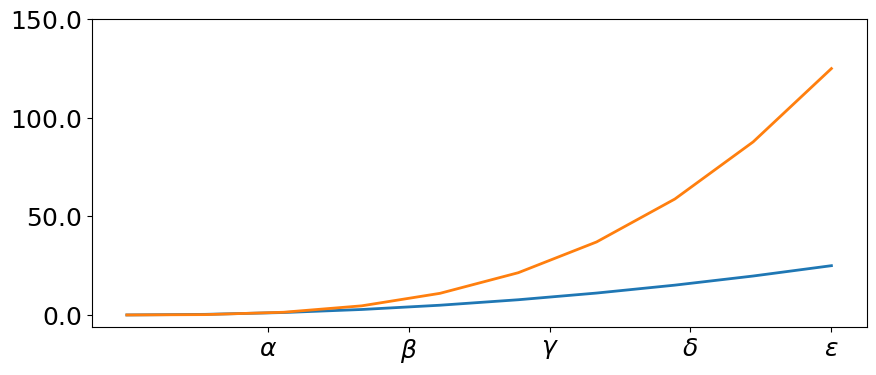

In [76]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(x, x**2, x, x**3, lw=2)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

#### Scientific Notation
With large numbers on axes, it is often better use scientific notation:

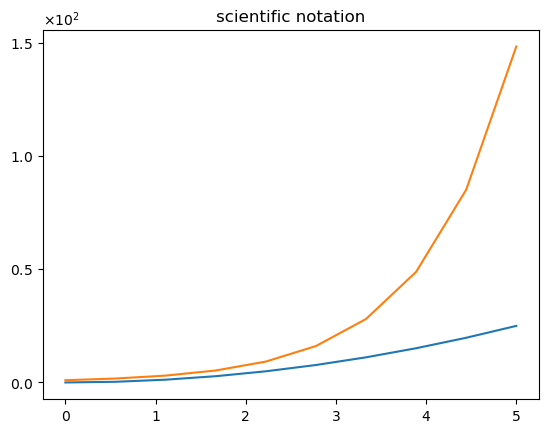

In [87]:
fig, ax = plt.subplots(1,1)

ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax.yaxis.set_major_formatter(formatter)

#### Axis number and axis label spacing 

Text(0, 0.5, 'y')

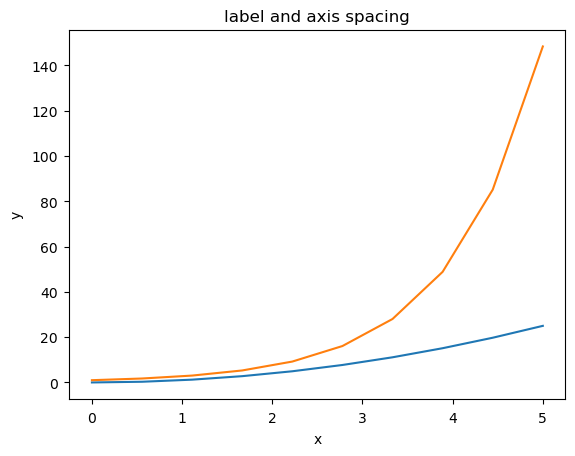

In [91]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad']= 5
matplotlib.rcParams['ytick.major.pad']= 5

fig, ax = plt.subplots(1,1)

ax.plot(x, x**2, x, np.exp(x))

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y")

In [93]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Axis grid

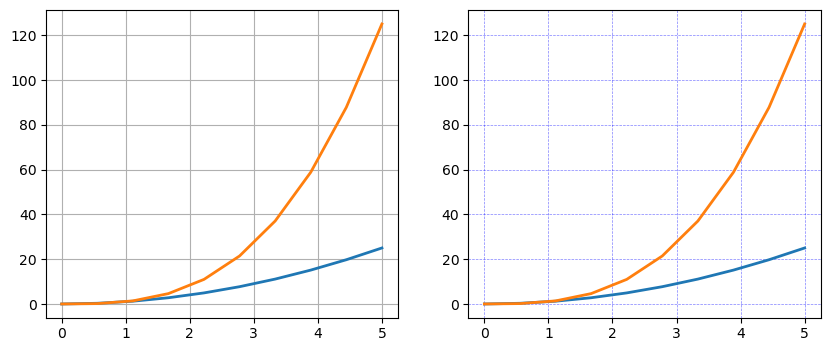

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

#### Twin Axes

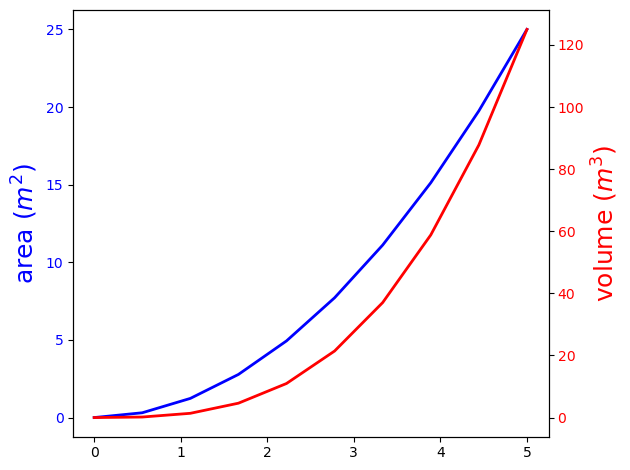

In [114]:
fig, ax1 = plt.subplots()

ax1.plot(x,x**2, lw=2, color='blue')
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")

for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color='red')
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color='red')

for label in ax2.get_yticklabels():
    label.set_color("red")

fig.tight_layout()

#### Other 2D plot styles

In [117]:
xx = np.linspace(-0.75, 1., 100)
n = np.array([0,1,2,3,4,5])

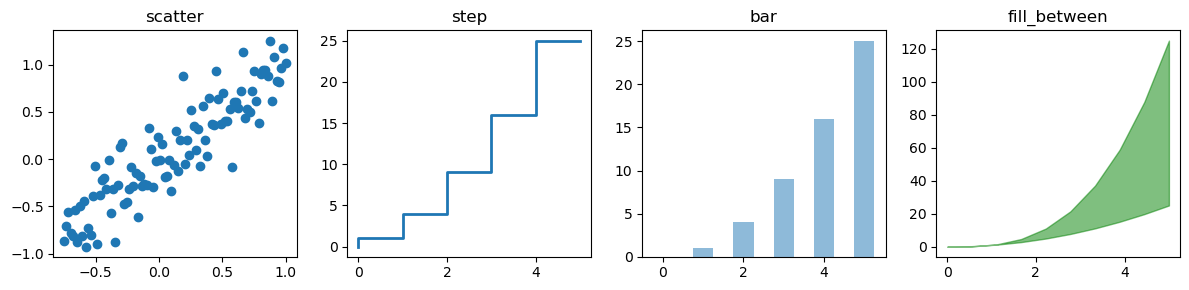

In [122]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between")

fig.tight_layout()

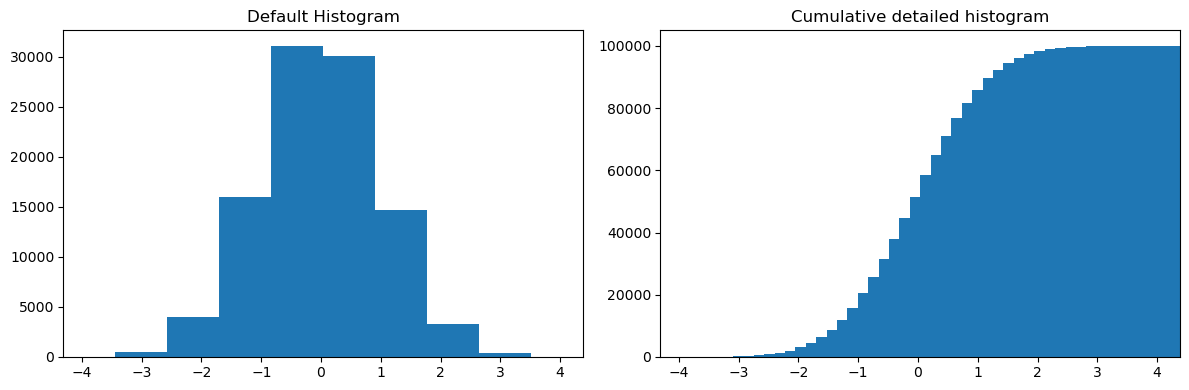

In [137]:
# A histogram
n = np.random.randn(100000)

fig, axes = plt.subplots(1,2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default Histogram")
axes[0].set_xlim((n.min(), n.max()))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((n.min(), n.max()))

fig.tight_layout()

#### Text Annotation
Annotationg text inmatplotlib can be done using text function. 

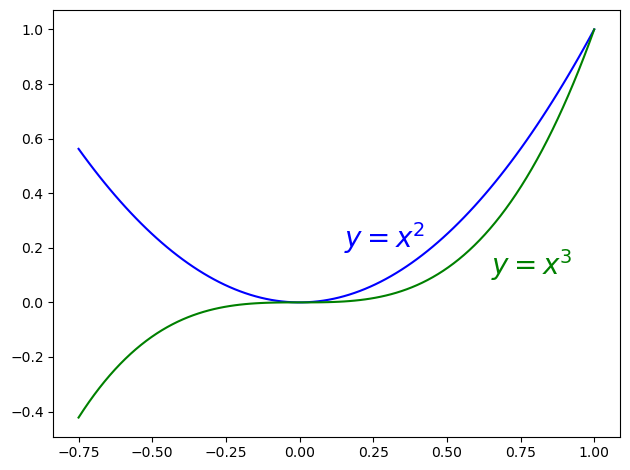

In [144]:

fig, ax = plt.subplots()

ax.plot(xx, xx**2, 'b')
ax.plot(xx, xx**3, 'g')

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green")

fig.tight_layout()

#### Figures with multiple subplots and insets
subplots

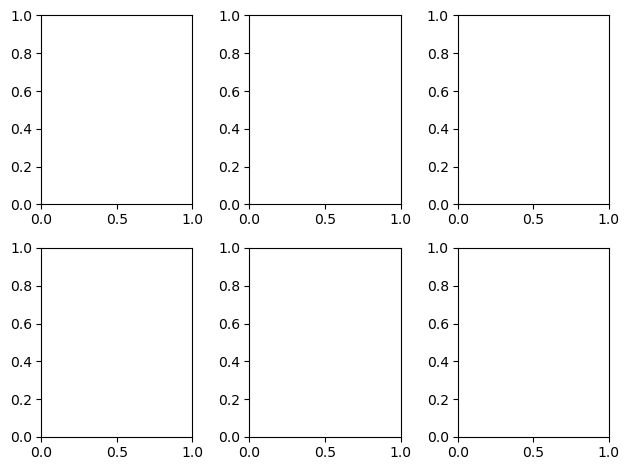

In [146]:
fig, ax = plt.subplots(2,3)
fig.tight_layout()

subplot2grid

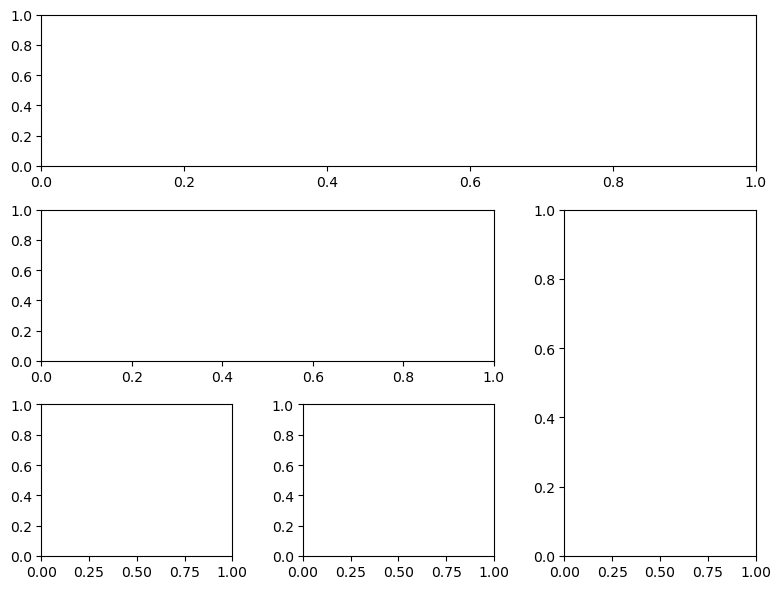

In [163]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

gridspec

In [164]:
import matplotlib.gridspec as gridspec

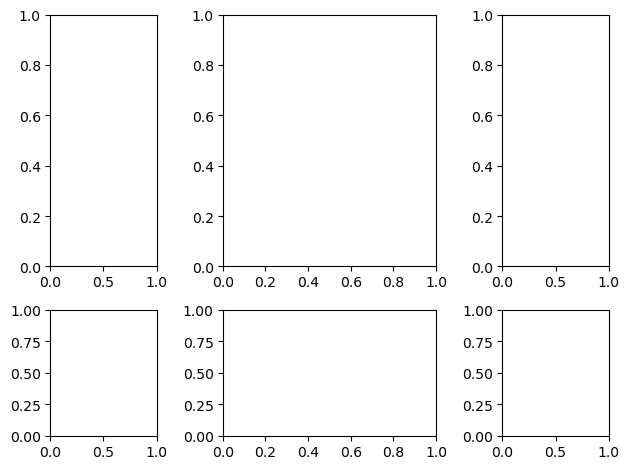

In [165]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

add_axes

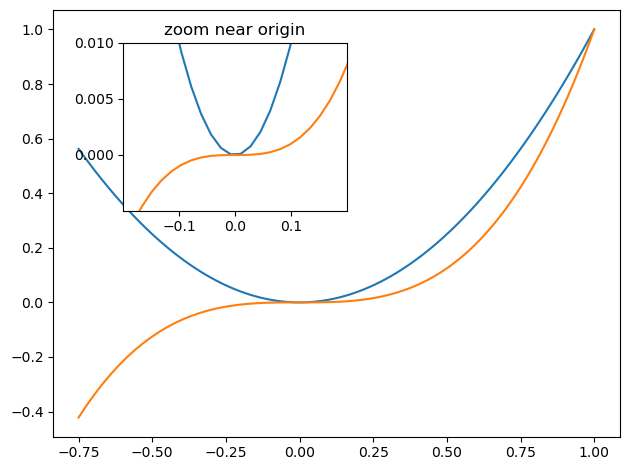

In [169]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1])

#### Colormap and contour figures

In [170]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [174]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)

X,Y = np.meshgrid(phi_p,phi_m)
Z = flux_qubit_potential(X,Y).T

pcolor

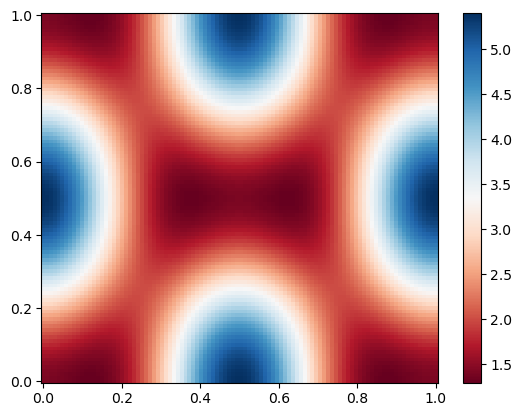

In [175]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

imshow

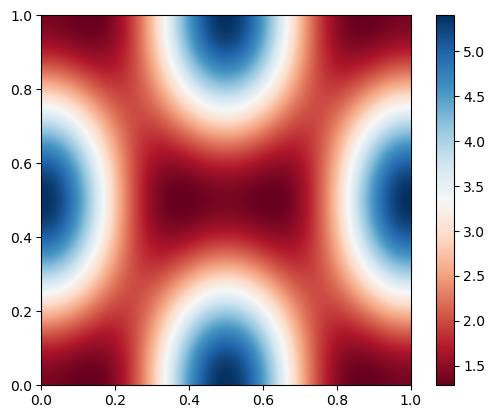

In [176]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

contour

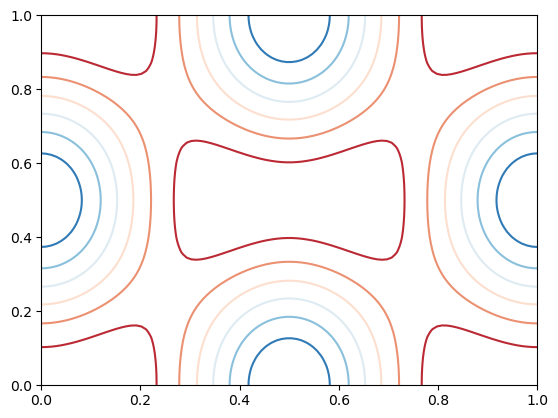

In [177]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

#### 3D figures

to use 3D graphics in matplotlib we need to create an instance of Axes3D class.

In [178]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

Surface plots

<bound method Figure.tight_layout of <Figure size 1400x600 with 3 Axes>>

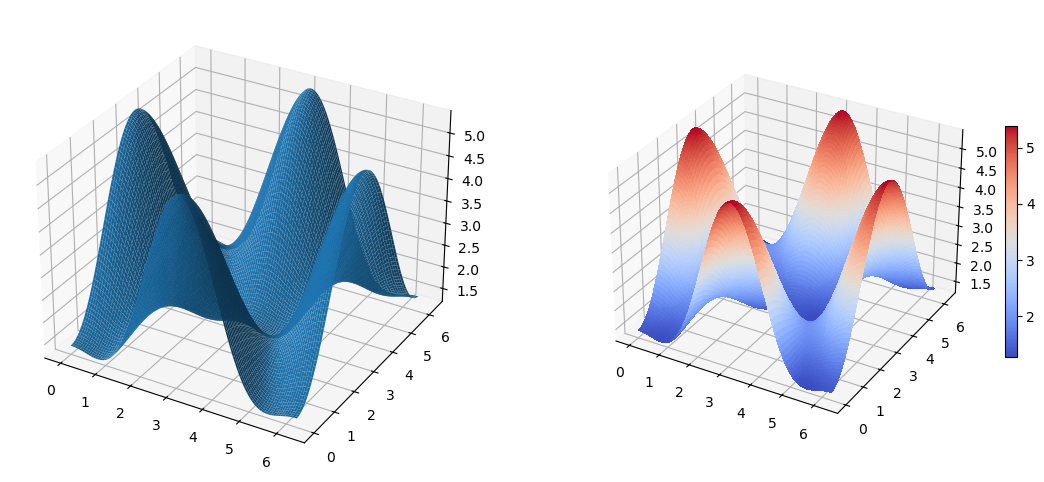

In [192]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

fig.tight_layout

Wire-frame plot

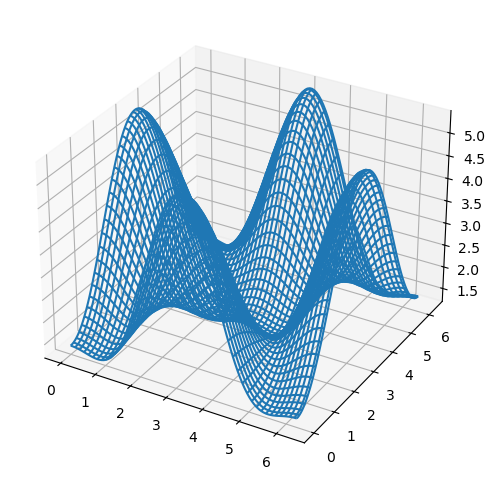

In [195]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)

Contour plots with Projections

(-3.141592653589793, 6.283185307179586)

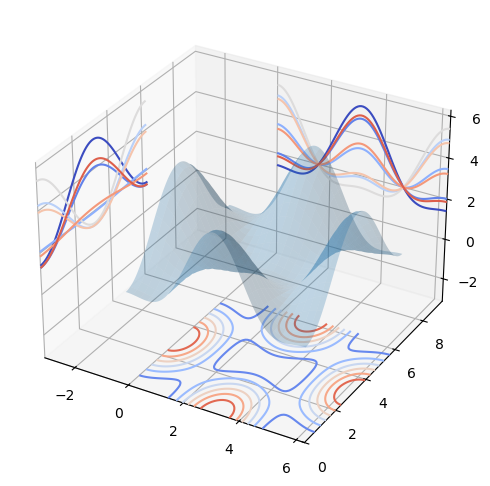

In [197]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi)
ax.set_ylim3d(0, 3*np.pi)
ax.set_zlim3d(-np.pi, 2*np.pi)

Change the view angle

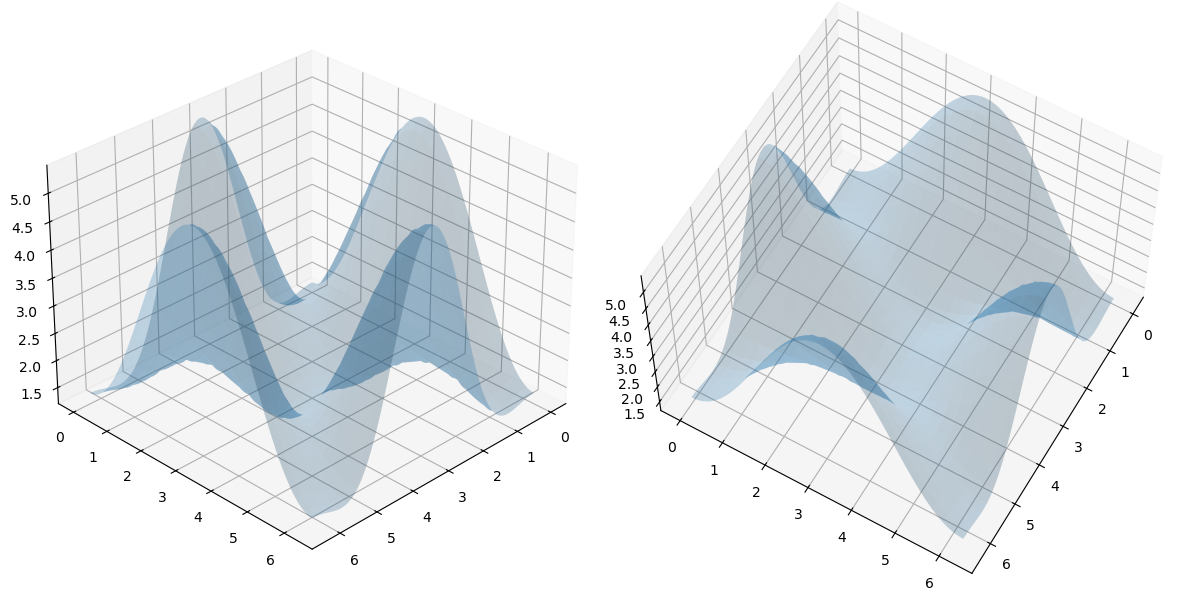

In [201]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(60, 30)

fig.tight_layout()

### Backends
matplotlib has a number of "backends" which are responsible for rendering graphs. The different backends are able to generate graphics with different formats and display/event loops. There is a distinction between noninteractive backends (such as 'agg', 'svg', 'pdf', etc.) that are only used to generate image files (e.g. with the savefig function), and interactive backends (such as Qt4Agg, GTK, MaxOSX) that can display a GUI window for interactively exploring figures.

In [202]:

print(matplotlib.rcsetup.all_backends)

['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


/var/folders/dx/xwlgf8b916qc_jnxddxk1w380000gn/T/ipykernel_56693/4011550412.py:1: MatplotlibDeprecationWarning: The all_backends attribute was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use ``matplotlib.backends.backend_registry.list_builtin()`` instead.
  print(matplotlib.rcsetup.all_backends)


#### Generating SVG with the svg backend

In [203]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# (e.g. Kernel > Restart)
# 
import matplotlib
matplotlib.use('svg')
import matplotlib.pylab as plt
import numpy
from IPython.display import Image, SVG

In [204]:
#
# Now we are using the svg backend to produce SVG vector graphics
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

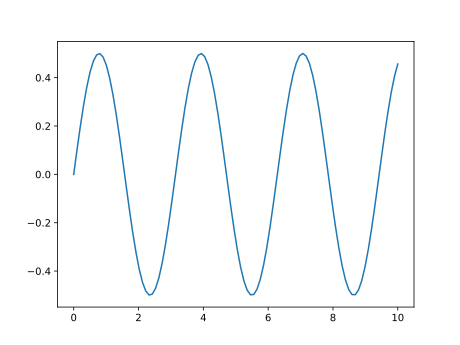

In [205]:
#
# Show the produced SVG file. 
#
SVG(filename="test.svg")

#### The IPython notebook inline backend

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import matplotlib.pylab as plt
import numpy

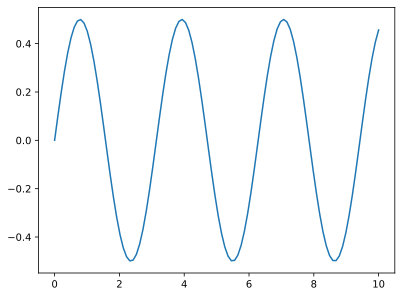

In [2]:
#
# Now we are using the SVG vector graphics displaced inline in the notebook
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

#### Interactive backend (this makes more sense in a python script file)

In [3]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# (e.g. Kernel > Restart)
# 
import matplotlib
matplotlib.use('MacOSX') # or for example MacOSX
import matplotlib.pylab as plt
import numpy as np

In [4]:
# Now, open an interactive plot window with the Qt4Agg backend
fig, ax = plt.subplots()
t = np.linspace(0, 10, 100)
ax.plot(t, np.cos(t) * np.sin(t))
plt.show()

Matlibplot Basics was done!!!!!